In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
import para_orstruc_func

In [2]:
def draw_3d(ind_raw):
    ind_raw = np.array(ind_raw)
    plt.rcParams["figure.figsize"] = [5, 5]
    # plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(ind_raw[:,0], ind_raw[:,1], ind_raw[:,2], alpha = 0.5, c = 'r')
    plt.show()

def create_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("Created Directory : ", directory)
    else:
        print("Directory already existed : ", directory)
    return directory

def Fitness(input_array):

    cr_pos = np.array(input_array[0])
    co_pos = np.array(input_array[1])
    ni_pos = np.array(input_array[2])
    ind_raw = np.array(input_array[3])

    cor_func_val_1 = para_orstruc_func.nn_cor_func_new(cr_pos, co_pos, ni_pos, ind_raw, 0.707107, threshold=0.01)
    cor_func_val_2 = para_orstruc_func.nn_cor_func_new(cr_pos, co_pos, ni_pos, ind_raw, 1, threshold=0.01)
    cor_func_val_3 = para_orstruc_func.nn_cor_func_new(cr_pos, co_pos, ni_pos, ind_raw, 1.224745, threshold=0.01)
    cor_func_val_4 = para_orstruc_func.nn_cor_func_new(cr_pos, co_pos, ni_pos, ind_raw, 1.414214, threshold=0.01)

    res_1 = abs(ideal_fir - cor_func_val_1)
    res_2 = abs(ideal_sec - cor_func_val_2)
    res_3 = abs(ideal_thr - cor_func_val_3)
    res_4 = abs(ideal_for - cor_func_val_4)
    res_1_ratio = res_1/ideal_fir
    res_2_ratio = res_2/ideal_sec
    res_3_ratio = res_3/ideal_thr
    res_4_ratio = res_4/ideal_for

    cor_func_inter2345val_1 = para_orstruc_func.nn_cor_func_inter(cr_pos, co_pos, ni_pos, ind_raw, 0.707107, [0.5, 2.5], threshold=0.01)
    cor_func_inter2345val_2 = para_orstruc_func.nn_cor_func_inter(cr_pos, co_pos, ni_pos, ind_raw, 1, [0.5, 2.5], threshold=0.01)
    cor_func_inter2345val_3 = para_orstruc_func.nn_cor_func_inter(cr_pos, co_pos, ni_pos, ind_raw, 1.224745, [0.5, 2.5], threshold=0.01)
    cor_func_inter2345val_4 = para_orstruc_func.nn_cor_func_inter(cr_pos, co_pos, ni_pos, ind_raw, 1.414214, [0.5, 2.5], threshold=0.01)

    res_1_in2345 = abs(ideal_fir_inter2345 - cor_func_inter2345val_1)
    res_2_in2345 = abs(ideal_sec_inter2345 - cor_func_inter2345val_2)
    res_3_in2345 = abs(ideal_thr_inter2345 - cor_func_inter2345val_3)
    res_4_in2345 = abs(ideal_for_inter2345 - cor_func_inter2345val_4)
    res_1_in2345_ratio = res_1_in2345/ideal_fir_inter2345
    res_2_in2345_ratio = res_2_in2345/ideal_sec_inter2345
    res_3_in2345_ratio = res_3_in2345/ideal_thr_inter2345
    res_4_in2345_ratio = res_4_in2345/ideal_for_inter2345

    cor_func_inter34val_1 = para_orstruc_func.nn_cor_func_inter(cr_pos, co_pos, ni_pos, ind_raw, 0.707107, [1, 2], threshold=0.01)
    cor_func_inter34val_2 = para_orstruc_func.nn_cor_func_inter(cr_pos, co_pos, ni_pos, ind_raw, 1, [1, 2], threshold=0.01)
    cor_func_inter34val_3 = para_orstruc_func.nn_cor_func_inter(cr_pos, co_pos, ni_pos, ind_raw, 1.224745, [1, 2], threshold=0.01)
    cor_func_inter34val_4 = para_orstruc_func.nn_cor_func_inter(cr_pos, co_pos, ni_pos, ind_raw, 1.414214, [1, 2], threshold=0.01)
    
    res_1_in34 = abs(ideal_fir_inter34 - cor_func_inter34val_1)
    res_2_in34 = abs(ideal_sec_inter34 - cor_func_inter34val_2)
    res_3_in34 = abs(ideal_thr_inter34 - cor_func_inter34val_3)
    res_4_in34 = abs(ideal_for_inter34 - cor_func_inter34val_4)
    res_1_in34_ratio = res_1_in34/ideal_fir_inter34
    res_2_in34_ratio = res_2_in34/ideal_sec_inter34
    res_3_in34_ratio = res_3_in34/ideal_thr_inter34
    res_4_in34_ratio = res_4_in34/ideal_for_inter34

    p_whole = 1
    p_2345 = 2
    p_34 = 5

    fitness = np.linalg.norm([res_1*p_whole,res_2*p_whole,res_3*p_whole,res_4*p_whole,
                            res_1_in2345*p_2345,res_2_in2345*p_2345,
                            res_3_in2345*p_2345,res_4_in2345*p_2345,
                            res_1_in34*p_34,res_2_in34*p_34,res_3_in34*p_34,res_4_in34*p_34])

    fitness_34 = np.linalg.norm([res_1_in34, res_2_in34, res_3_in34, res_4_in34])

    fitness_ratio = np.array([res_1_ratio,res_2_ratio,res_3_ratio,res_4_ratio,
                            res_1_in2345_ratio,res_2_in2345_ratio,res_3_in2345_ratio,res_4_in2345_ratio,
                            res_1_in34_ratio,res_2_in34_ratio,res_3_in34_ratio,res_4_in34_ratio])
        
    fitness_part_ratio = np.array([np.mean(fitness_ratio[0:4]),np.mean(fitness_ratio[4:8]),np.mean(fitness_ratio[8:12])])
    fitness_ratio_34 = np.array([res_1_in34_ratio,res_2_in34_ratio,res_3_in34_ratio,res_4_in34_ratio])

    return fitness, fitness_34, np.mean(fitness_ratio), fitness_part_ratio, fitness_ratio_34

In [23]:
cr_content, co_content = 0.4, 0.4

ideal_fir = para_orstruc_func.ideal_cor_func(cr_content, co_content, 935)
ideal_sec = para_orstruc_func.ideal_cor_func(cr_content, co_content, 387)
ideal_thr = para_orstruc_func.ideal_cor_func(cr_content, co_content, 1394)
ideal_for = para_orstruc_func.ideal_cor_func(cr_content, co_content, 621)

ideal_fir_inter2345 = para_orstruc_func.ideal_cor_func(cr_content, co_content, 593)
ideal_sec_inter2345 = para_orstruc_func.ideal_cor_func(cr_content, co_content, 232)
ideal_thr_inter2345 = para_orstruc_func.ideal_cor_func(cr_content, co_content, 824)
ideal_for_inter2345 = para_orstruc_func.ideal_cor_func(cr_content, co_content, 363)

ideal_fir_inter34 = para_orstruc_func.ideal_cor_func(cr_content, co_content, 251)
ideal_sec_inter34 = para_orstruc_func.ideal_cor_func(cr_content, co_content, 77)
ideal_thr_inter34 = para_orstruc_func.ideal_cor_func(cr_content, co_content, 256)
ideal_for_inter34 = para_orstruc_func.ideal_cor_func(cr_content, co_content, 104)

In [3]:
atom_r = 5010
cr_content, co_content = 0.5, 0.1

origin_list = np.load(
    f'C:/Users/yaoho/OneDrive - Kyoto University/Project/SFE/origin_list/origin_list{atom_r}.npy',
    allow_pickle = True)

fitness_ratio = np.load(
    f'C:/Users/yaoho/OneDrive - Kyoto University/Project/SFE/origin_list/fitness_ratio{atom_r}.npy',
    allow_pickle=True
)

fitness_mean = np.load(
    f'C:/Users/yaoho/OneDrive - Kyoto University/Project/SFE/origin_list/fitness_result{atom_r}.npy',
    allow_pickle=True
)

fitness_whole = np.load(
    f'C:/Users/yaoho/OneDrive - Kyoto University/Project/SFE/origin_list/fitness_whole{atom_r}.npy',
    allow_pickle=True
)
len(origin_list)

210

In [7]:
origin_list = np.load(
    '/home/wz/OneDrive/Project/SFE/origin_list/origin_list4020.npy',
    allow_pickle = True)

fitness_ratio = np.load(
    '/home/wz/OneDrive/Project/SFE/origin_list/fitness_ratio4020.npy',
    allow_pickle=True
)

fitness_mean = np.load(
    '/home/wz/OneDrive/Project/SFE/origin_list/fitness_result4020.npy',
    allow_pickle=True
)

fitness_whole = np.load(
    '/home/wz/OneDrive/Project/SFE/origin_list/fitness_whole4020.npy',
    allow_pickle=True
)
len(origin_list)

337

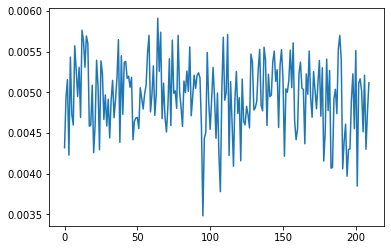

In [4]:
plt.plot(fitness_ratio)

In [5]:
len_index = 20
start_index = 1
name_raw = 'Cr50Co10Ni40_SFE'
name_stack = 'Cr50Co10Ni40_stack'

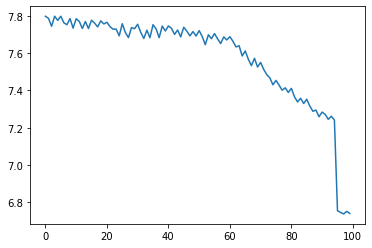

In [6]:
plt.plot(fitness_whole)

In [7]:
origin_list = origin_list[::10][-20:]
len(origin_list)

20

In [8]:
def norm_trans(input_array):
    input_array = np.array(input_array)
    return input_array/np.array([3*math.sqrt(1/2), 6*math.sqrt(3/2), 6*math.sqrt(1/3)])
def create_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("Created Directory : ", directory)
    else:
        print("Directory already existed : ", directory)
    return directory
def stack_trans(input_coor):
    input_coor = np.array(input_coor)
    # when normal condition
    for i in input_coor:
        if i[2] > 1.5:
            i[1] -= 2/3*math.sqrt(3/2)
            if i[1] < 0:
                i[1] = 6*math.sqrt(3/2) + i[1]
                
    return input_coor

dir_front = '/run/user/1000/gvfs/google-drive:host=gmail.com,user=zwang3805/1OrAZMEHaX1PaJzxIh81neGrw5NbLvuPm/1-1UYw9XFm7lnGKPoowSp90OZIU2s0zAM/128YpPw9EoGtJRgzh2t9w4X_Ra1wsC38Z'
dir_front = 'G:/マイドライブ/MSAD/CONFIG/multi_cor'

for i in range(len_index):
    trial = start_index+i
    # create_dir(f'G:/マイドライブ/MSAD/CONFIG/multi_cor/{name_raw}_try{trial}')
    # create_dir(f'G:/マイドライブ/MSAD/CONFIG/multi_cor/{name_stack}_try{trial}')
    create_dir(dir_front + f'/{name_raw}_try{trial}')
    create_dir(dir_front + f'/{name_stack}_try{trial}')
    
    cr_pos_chosen = np.array(origin_list[i][0])
    cr_pos_stack = stack_trans(cr_pos_chosen)
    cr_pos_chosen = norm_trans(cr_pos_chosen)
    cr_pos_stack = norm_trans(cr_pos_stack)
    for i_cr in range(len(cr_pos_chosen)):
        cr_pos_chosen[i_cr][2] = 1/2*cr_pos_chosen[i_cr][2]
        cr_pos_stack[i_cr][2] = 1/2*cr_pos_stack[i_cr][2]
        
    co_pos_chosen = np.array(origin_list[i][1])
    co_pos_stack = stack_trans(co_pos_chosen)
    co_pos_chosen = norm_trans(co_pos_chosen)
    co_pos_stack = norm_trans(co_pos_stack)
    for i_co in range(len(co_pos_chosen)):
        co_pos_chosen[i_co][2] = 1/2*co_pos_chosen[i_co][2]
        co_pos_stack[i_co][2] = 1/2*co_pos_stack[i_co][2]
        
    ni_pos_chosen = np.array(origin_list[i][2])
    ni_pos_stack = stack_trans(ni_pos_chosen)
    ni_pos_chosen = norm_trans(ni_pos_chosen)
    ni_pos_stack = norm_trans(ni_pos_stack)
    for i_ni in range(len(ni_pos_chosen)): 
        ni_pos_chosen[i_ni][2] = 1/2*ni_pos_chosen[i_ni][2]
        ni_pos_stack[i_ni][2] = 1/2*ni_pos_stack[i_ni][2]
    
    np.save(dir_front + f'/{name_raw}_try{trial}/{name_raw}_cr_chosen.npy', 
            cr_pos_chosen)
    np.save(dir_front + f'/{name_raw}_try{trial}/{name_raw}_co_chosen.npy', 
            co_pos_chosen)
    np.save(dir_front + f'/{name_raw}_try{trial}/{name_raw}_ni_chosen.npy', 
            ni_pos_chosen)
    
    np.save(dir_front + f'/{name_stack}_try{trial}/{name_stack}_cr_stackchosen.npy', 
            cr_pos_stack)
    np.save(dir_front + f'/{name_stack}_try{trial}/{name_stack}_co_stackchosen.npy', 
            co_pos_stack)
    np.save(dir_front + f'/{name_stack}_try{trial}/{name_stack}_ni_stackchosen.npy', 
            ni_pos_stack)
    
    ind_stack = np.concatenate([cr_pos_stack, co_pos_stack, ni_pos_stack], axis = 0)
    ind_raw = np.concatenate([cr_pos_chosen, co_pos_chosen, ni_pos_chosen], axis = 0)

Created Directory :  G:/マイドライブ/MSAD/CONFIG/multi_cor/Cr50Co10Ni40_SFE_try1
Created Directory :  G:/マイドライブ/MSAD/CONFIG/multi_cor/Cr50Co10Ni40_stack_try1
Created Directory :  G:/マイドライブ/MSAD/CONFIG/multi_cor/Cr50Co10Ni40_SFE_try2
Created Directory :  G:/マイドライブ/MSAD/CONFIG/multi_cor/Cr50Co10Ni40_stack_try2
Created Directory :  G:/マイドライブ/MSAD/CONFIG/multi_cor/Cr50Co10Ni40_SFE_try3
Created Directory :  G:/マイドライブ/MSAD/CONFIG/multi_cor/Cr50Co10Ni40_stack_try3
Created Directory :  G:/マイドライブ/MSAD/CONFIG/multi_cor/Cr50Co10Ni40_SFE_try4
Created Directory :  G:/マイドライブ/MSAD/CONFIG/multi_cor/Cr50Co10Ni40_stack_try4
Created Directory :  G:/マイドライブ/MSAD/CONFIG/multi_cor/Cr50Co10Ni40_SFE_try5
Created Directory :  G:/マイドライブ/MSAD/CONFIG/multi_cor/Cr50Co10Ni40_stack_try5
Created Directory :  G:/マイドライブ/MSAD/CONFIG/multi_cor/Cr50Co10Ni40_SFE_try6
Created Directory :  G:/マイドライブ/MSAD/CONFIG/multi_cor/Cr50Co10Ni40_stack_try6
Created Directory :  G:/マイドライブ/MSAD/CONFIG/multi_cor/Cr50Co10Ni40_SFE_try7
Created Direc

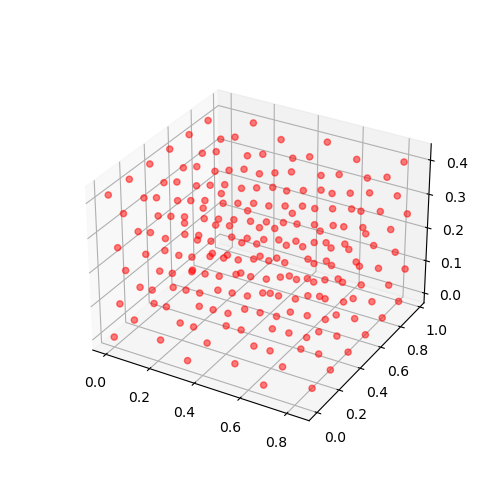

In [33]:
%matplotlib widget 
draw_3d(ind_stack)

In [29]:
class re_stack:
    def __init__(self, cr_pos, co_pos, ni_pos):
        self.cr_pos = cr_pos
        self.co_pos = co_pos
        self.ni_pos = ni_pos

    def back_to_norm(input_array):
        return input_array/np.array([
            3*math.sqrt(2)/2, 6*math.sqrt(3/2), 2*6*math.sqrt(1/3)])

    def back_to_raw(input_array):
        return input_array*np.array([
            3*math.sqrt(2)/2, 6*math.sqrt(3/2), 6*math.sqrt(1/3)])

    def stack_trans(input_coor):
        input_coor = np.array(input_coor)
        # when normal condition
        for i in input_coor:
            if i[2] > 1.5:
                i[1] -= 2/3*math.sqrt(3/2)
                if i[1] < 0:
                    i[1] = 6*math.sqrt(3/2) + i[1]
                    
        return input_coor

    def trans(self):
        cr_pos = self.cr_pos
        co_pos = self.co_pos
        ni_pos = self.ni_pos
        cr_pos[:, 0] = 3/2*math.sqrt(2)*cr_pos[:, 0]

        cr_pos = re_stack.back_to_raw(cr_pos)
        co_pos = re_stack.back_to_raw(co_pos)
        ni_pos = re_stack.back_to_raw(ni_pos)

        cr_pos[:, 2] = 2*cr_pos[:, 2]
        co_pos[:, 2] = 2*co_pos[:, 2]
        ni_pos[:, 2] = 2*ni_pos[:, 2]
        
        cr_stack = re_stack.stack_trans(cr_pos)
        co_stack = re_stack.stack_trans(co_pos)
        ni_stack = re_stack.stack_trans(ni_pos)

        cr_pos = re_stack.back_to_norm(cr_pos)
        co_pos = re_stack.back_to_norm(co_pos)
        ni_pos = re_stack.back_to_norm(ni_pos)

        cr_stack = re_stack.back_to_norm(cr_stack)
        co_stack = re_stack.back_to_norm(co_stack)
        ni_stack = re_stack.back_to_norm(ni_stack)

        return cr_pos, co_pos, ni_pos, cr_stack, co_stack, ni_stack


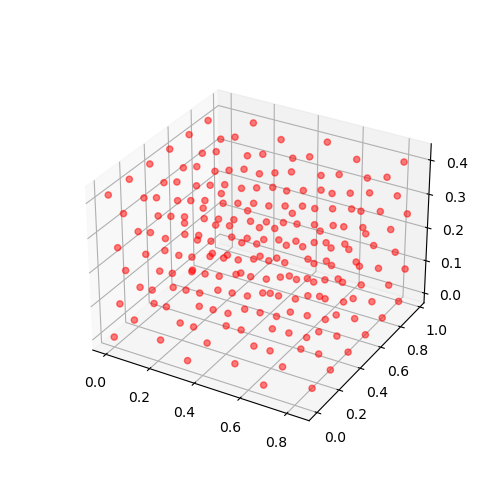

In [33]:
%matplotlib widget 
ind_raw = np.concatenate([cr_pos, co_pos, ni_pos], axis=0)
ind_stack = np.concatenate([cr_stack, co_stack, ni_stack], axis=0)
draw_3d(ind_stack)